In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier


from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
table = PrettyTable()
table.field_names= ["Model","Hyperparameters","Log_Loss"]
print(table)

+-------+-----------------+----------+
| Model | Hyperparameters | Log_Loss |
+-------+-----------------+----------+
+-------+-----------------+----------+


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [0]:
data_dir='/content/drive/My Drive/Colab Notebooks/AppliedAI/Quora_Assignment/'

In [0]:
#Creating db file from csv
if not os.path.isfile(data_dir+'Quora/train.db'):
    disk_engine = create_engine('sqlite:///'+data_dir+'Quora/train.db')
    start = dt.datetime.now()
#     chunksize = 180000
    chunksize = 50000
    j = 0
    index_start = 1
    for df in pd.read_csv(data_dir+'final_features.csv', 
                          names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], 
                          chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
else:
  print("train.db found..!")

train.db found..!


In [0]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [0]:
read_db = data_dir+'Quora/train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [0]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        # data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        
        # changing the number to 50k as it is taking ages for 100k
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 50001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [0]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [0]:
data.shape

(50000, 794)

In [0]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,344_y,345_y,346_y,347_y,348_y,349_y,350_y,351_y,352_y,353_y,354_y,355_y,356_y,357_y,358_y,359_y,360_y,361_y,362_y,363_y,364_y,365_y,366_y,367_y,368_y,369_y,370_y,371_y,372_y,373_y,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.999950002499875,0.181816528940646,0.66664444518516,0.285710204139941,0.799984000319994,0.199999000005,0.0,1.0,15.0,12.5,94,41,33,66,0.333333333333333,1,1,114,29,19,5,2.0,22.0,0.0909090909090909,2,0,-85.3459591418505,125.568486452103,31.876295812428,96.7472469210625,-79.3873648643494,27.79312479496,-177.160131514072,-180.27711391449,65.2375163435936,-19.5468770265579,-8.98709356784821,-58.4933117330074,-102.37943816185,-137.561043977737,...,0.885477647185326,1.53697718307376,-4.67616342590191,-7.10287547111511,12.1149072051048,-4.07698553800583,5.24991947412491,1.96274833381176,6.09013909101486,6.53252662718296,16.9059863835573,13.4571490362287,-9.07376509904862,6.70295213535428,-0.83556717261672,-7.86749815940857,-3.54848426580429,0.905137851834297,-2.39231023192406,3.5617288351059,-6.06533962488174,0.669412223622203,-5.4353698194027,-2.52202244102955,4.6273028254509,1.13940976560116,10.0689018368721,0.990645285695791,4.6208560615778,12.5890067666769,-4.89216141402721,8.35149371623993,0.90499260276556,-2.19234795868397,-5.60868179053068,4.09342328924686,-0.779529765248299,-0.166399898007512,-3.12041002511978,1.29996086657047
2,0.499987500312492,0.499987500312492,0.599988000239995,0.428565306209911,0.555549382784636,0.454541322351615,1.0,1.0,2.0,10.0,73,71,71,69,0.260869565217391,1,2,47,45,11,9,5.0,20.0,0.25,3,1,28.7152041196823,102.300040125847,61.7901307344437,149.324989385903,2.83177876472473,48.5374240875244,-39.9058465957642,-95.5480947345495,43.1472904384136,4.92888584733009,-40.3215506672859,50.1784988641739,-10.6363410055637,-49.4634605646133,...,-14.2931249700487,-12.5736556127667,-17.2872011214495,10.7184909582138,36.6666896520474,-10.1201016306877,-10.428794439882,6.28767335414887,-17.574275970459,5.44762632250786,24.8633283227682,-8.36484111845493,2.17521238420159,-20.1844358891249,-14.4738538041711,-24.1612150967121,-7.44903835654259,5.69680839776993,14.1035834550858,7.20335249602795,-21.8754424750805,-6.11558823287487,18.6613321304321,-7.0145745575428,20.7445233054459,19.5110548585653,-16.2410762906075,11.1624874323606,-8.4198195040226,-14.8315860331059,10.3469033017755,10.6902670189738,2.59925612807274,-4.90873806690797,6.8922843337059,4.39012718200684,-18.3507874011993,23.3305455297232,-0.964614599943161,0.68968285061419
3,0.666655555740738,0.571420408279882,0.499987500312492,0.399992000159997,0.545449586821938,0.545449586821938,0.0,0.0,0.0,11.0,73,69,67,67,0.265625,1,4,63,65,11,12,6.0,23.0,0.260869565217391,5,3,-14.4464862942696,81.468402966857,30.4611067771912,133.249725461006,-55.5779926776886,52.8698387145996,-77.0619264617563,-92.2418439388275,34.3037858009338,-28.7990303039551,-50.548225581646,-10.489264190197,-21.9207191467285,-43.5489989519119,...,-2.43974298238754,-20.0534595251083,-17.5960883535445,1.45508454740047,20.2246660292149,-21.1227210462093,-17.3223742395639,-10.3944146633148,-31.0023453235626,25.8265548199415,26.0864016711712,10.4139163615182,-11.7224054038525,-14.2681686356664,10.3104092925787,-26.6746992468834,-25.2058066427708,24.1437789946794,1.95643658190966,-7.1115125566721,-17.1472481489182,6.17532496154308,35.7439393401146,-10.2593070864677,9.32987613976002,-2.21264850348234,6.33599585294724,34.2153151035309,-3.74119085073471,-14.3433989286423,-3.85105261951685,19.2504652142525,20.3883509933949,-11.1053389906883,7.63580176234245,19.7212549448013,0.772680208086968,-0.973012406378984,0.661315619945

<h2> 4.2 Converting strings to numerics </h2>

In [0]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
# cols = list(data.columns)
# for i in cols:
#     data[i] = data[i].apply(pd.to_numeric)
#     print(i)

# Faster and cleaner code
data=data.astype(float)

In [0]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [0]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, 
                                  stratify=y_true, test_size=0.3)

In [0]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (35000, 794)
Number of data points in test data : (15000, 794)


In [0]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6280571428571429 Class 1:  0.37194285714285713
---------- Distribution of output variable in test data ----------
Class 0:  0.37193333333333334 Class 1:  0.37193333333333334


In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8869456220491898


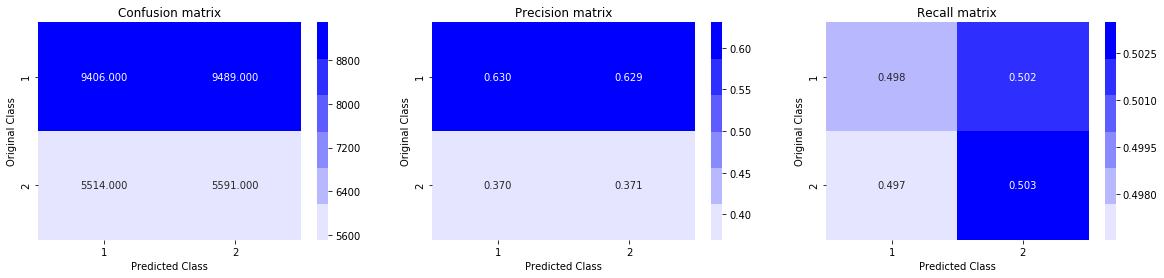

In [0]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.56662713178077
For values of alpha =  0.0001 The log loss is: 0.45626538982765824
For values of alpha =  0.001 The log loss is: 0.451440451281298
For values of alpha =  0.01 The log loss is: 0.44340750607505
For values of alpha =  0.1 The log loss is: 0.4414283106295279
For values of alpha =  1 The log loss is: 0.46537051003351315
For values of alpha =  10 The log loss is: 0.5084292621090118


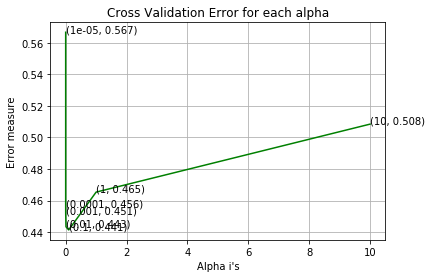

For values of best alpha =  0.1 The train log loss is: 0.43291199173090306
For values of best alpha =  0.1 The test log loss is: 0.4414283106295279
Total number of data points : 30000


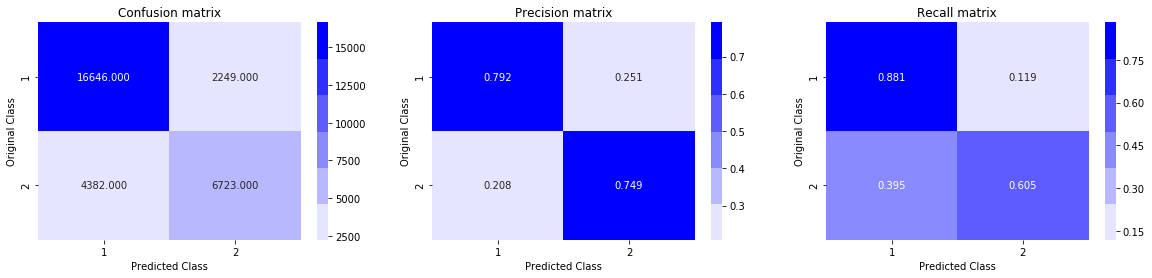

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.657611721261
For values of alpha =  0.0001 The log loss is: 0.489669093534
For values of alpha =  0.001 The log loss is: 0.521829068562
For values of alpha =  0.01 The log loss is: 0.566295616914
For values of alpha =  0.1 The log loss is: 0.599957866217
For values of alpha =  1 The log loss is: 0.635059427016
For values of alpha =  10 The log loss is: 0.654159467907


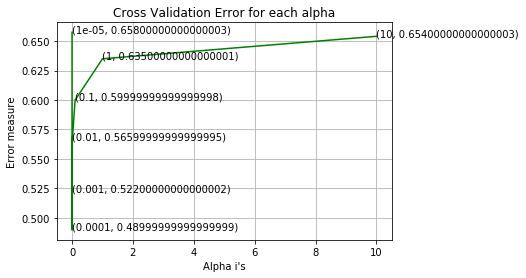

For values of best alpha =  0.0001 The train log loss is: 0.478054677285
For values of best alpha =  0.0001 The test log loss is: 0.489669093534
Total number of data points : 30000


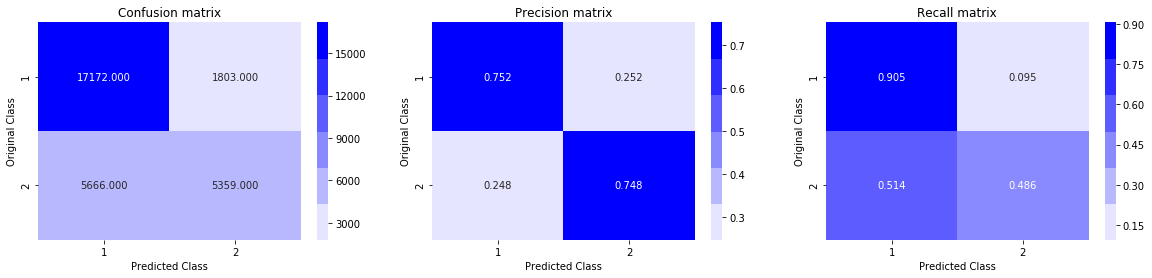

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [0]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20,
                verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

Total number of data points : 30000


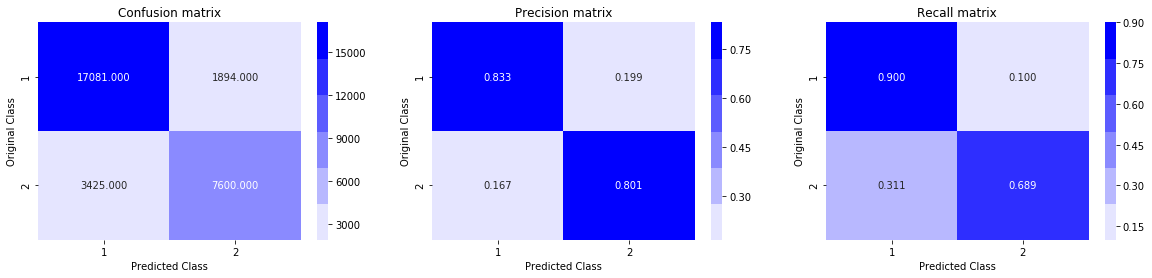

In [0]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


In [0]:
import spacy
from scipy.sparse import csr_matrix, hstack

In [0]:
# To prepare data to solve the given assignment we will use the stored dataframe
# for some of the prepared features, and use the original Quora questions again to 
# correctly get the tf-Idf values without data leakage

In [0]:
data=pd.merge(pd.read_csv(data_dir+'Quora/final_features.csv', index_col='id',
              usecols=['id','is_duplicate','cwc_min', 'cwc_max', 'csc_min',
                       'csc_max', 'ctc_min', 'ctc_max','last_word_eq', 'first_word_eq',
                       'abs_len_diff', 'mean_len','token_set_ratio', 'token_sort_ratio',
                       'fuzz_ratio','fuzz_partial_ratio', 'longest_substr_ratio', 
                       'freq_qid1', 'freq_qid2','q1len', 'q2len', 'q1_n_words', 
                       'q2_n_words', 'word_Common','word_Total', 'word_share', 
                       'freq_q1+q2', 'freq_q1-q2']),
             pd.read_csv(data_dir+'Quora/train.csv', index_col='id',
              usecols=['id','question1','question2']),
              how='inner', on='id')

In [0]:
#Select 50k duplicates and 50k non-duplicates for balanced dataset
data=data[data.is_duplicate==1][:50000].append(
                    data[data.is_duplicate==0][:50000],ignore_index=True)

In [0]:
#Re-shuffling the dataframe
data=data.sample(frac=1).reset_index(drop=True)

In [0]:
#Code for pre-processing of questions text
nlp=spacy.load('en_core_web_sm')
def preprocess(text):
    # lower case
    text = str(text).lower()
    # decontractions and replacement
    text = text.replace(",000,000", "m").replace(",000", "k").replace("′", "'")\
           .replace("’", "'").replace("won't", "will not").replace("cannot", "can not")\
           .replace("can't", "can not").replace("n't", " not")\
           .replace("what's", "what is").replace("it's", "it is")\
           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
           .replace("€", " euro ").replace("'ll", " will")
    text = re.sub(r"([0-9]+)000000", r"\1m", text)
    text = re.sub(r"([0-9]+)000", r"\1k", text)

    # nlp processing using spacy. We will use lemma as different forms of the same
    # word unnecessarily increase the feature size and create noise rather than adding
    # information
    tokens = nlp(text)
    text = ' '.join([t.lemma_ for t in tokens if t.lemma_ != '-PRON-' and \
#                                   t.is_alpha and not t.is_digit and \
                                  not t.is_punct and not t.is_stop])
    return text

In [0]:
# Apply pre-processing and save
data.question1=data.question1.apply(preprocess)
data.question2=data.question2.apply(preprocess)

In [0]:
data['question_pair']=data.question1+' '+data.question2

In [0]:
data.drop(columns=['question1','question2'],inplace=True)

In [0]:
# data.to_csv(data_dir+'final_data_pp.csv',index=False)

In [0]:
data=pd.read_csv(data_dir+'final_data_pp.csv')

In [0]:
# Split data and proceed for vectorization

In [0]:
data.columns

Index(['is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'question_pair'],
      dtype='object')

In [0]:
# Y_data is the 'is_duplicate'
Y_data=data.is_duplicate.to_numpy()
# X_data is all the features excluding 'is_duplicate'
X_data=data.drop(columns=['is_duplicate'])

In [0]:
# Split in 70:30 ratio
X_train,X_test, Y_train, Y_test = train_test_split(X_data, Y_data, 
                              stratify=Y_data, test_size=0.3,random_state=1234)

In [0]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=15000)
tf_idf_vect.fit(X_train.question_pair)
print("some sample features(unique words in the corpus)",
                                tf_idf_vect.get_feature_names()[0:10])
print('='*50)

tfIdf_train = tf_idf_vect.transform(X_train.question_pair)
tfIdf_test = tf_idf_vect.transform(X_test.question_pair)

print("the type of count vectorizer ",type(tfIdf_train))
print("the shape of out text TFIDF vectorizer ",tfIdf_train.get_shape())
print("the number of unique words including both unigrams and bigrams ",
                    tfIdf_train.get_shape()[1])

some sample features(unique words in the corpus) ['00', '04', '10', '10 cgpa', '10 day', '10 favourite', '10 good', '10 hour', '10 kg', '10 million']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (70000, 15000)
the number of unique words including both unigrams and bigrams  15000


In [0]:
# Drop the 'question_pair' column
X_train.drop(columns=['question_pair'],inplace=True)
X_test.drop(columns=['question_pair'],inplace=True)

In [0]:
# Add the Tf-Idf vectors with the other features
X_train=hstack([X_train.to_sparse().astype(float),tfIdf_train])
X_test=hstack([X_test.to_sparse().astype(float),tfIdf_test])

In [0]:
# Using the classification code from above
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    print("Working for alpha : ",i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log',
                        random_state=1234, n_jobs=-1)
    clf.fit(X_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, Y_train)
    predict_y = sig_clf.predict_proba(X_test)
    loss_value=log_loss(Y_test, predict_y,labels=clf.classes_, eps=1e-15)
    log_error_array.append(loss_value)
    print('For values of alpha = ', i, "The log loss is:",loss_value)

Working for alpha :  1e-05
For values of alpha =  1e-05 The log loss is: 0.4427934371192924
Working for alpha :  0.0001
For values of alpha =  0.0001 The log loss is: 0.4263252404402409
Working for alpha :  0.001
For values of alpha =  0.001 The log loss is: 0.4423823907181991
Working for alpha :  0.01
For values of alpha =  0.01 The log loss is: 0.4739527428386096
Working for alpha :  0.1
For values of alpha =  0.1 The log loss is: 0.473400739483149
Working for alpha :  1
For values of alpha =  1 The log loss is: 0.5079527165965277
Working for alpha :  10
For values of alpha =  10 The log loss is: 0.5550171046260312


In [0]:
# Best figures for 7k features
# For values of alpha =  0.01 The log loss is: 0.45523614249492544

# Best figures for 15k features
# For values of alpha =  0.0001 The log loss is: 0.4263252404402409

# Finally we use all features(21540)
# For values of alpha =  1e-05 The log loss is: 0.4321301625022141

# If we increase the max_df to 10 and for all features(9900)
# For values of alpha =  0.0001 The log loss is: 0.4363398372482077

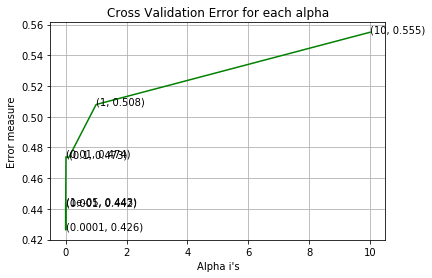

In [0]:
# Using Plotting graph from above
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  0.0001 The train log loss is: 0.4310660274785347
For values of best alpha =  0.0001 The test log loss is: 0.4263252404402409
Total number of data points : 30000


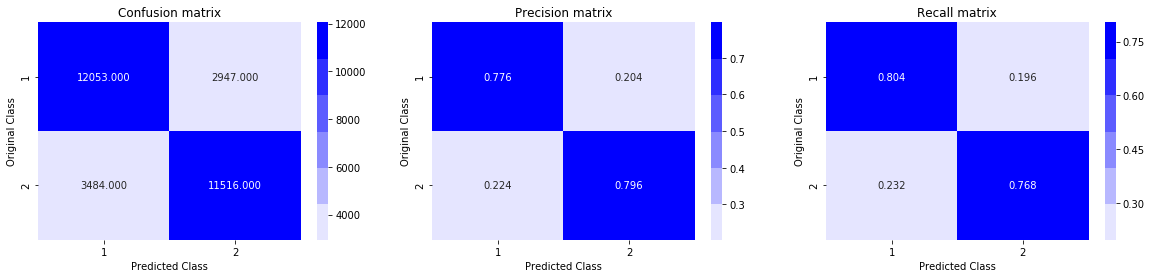

In [0]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log',
                    random_state=1234)
clf.fit(X_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, Y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 
      "The train log loss is:",log_loss(Y_train, predict_y, 
                              labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(Y_test, predict_y, 
                              labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

In [0]:
table.add_row(['Logistic Reg',' alpha = 0.0001', 'Train Log=0.43  Test Log=0.42'])
print(table)

+--------------+-----------------+-------------------------------+
|    Model     | Hyperparameters |            Log_Loss           |
+--------------+-----------------+-------------------------------+
| Logistic Reg |    C = 0.0001   | Train Log=0.43  Test Log=0.42 |
| Logistic Reg |  alpha = 0.0001 | Train Log=0.43  Test Log=0.42 |
+--------------+-----------------+-------------------------------+


In [0]:
# Lets go for Linear SVM now

In [0]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    print("Working for alpha : ",i)
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',
                        random_state=1234, n_jobs=-1)
    clf.fit(X_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, Y_train)
    predict_y = sig_clf.predict_proba(X_test)
    loss_value=log_loss(Y_test, predict_y,labels=clf.classes_, eps=1e-15)
    log_error_array.append(loss_value)
    print('For values of alpha = ', i, "The log loss is:",loss_value)

Working for alpha :  1e-05
For values of alpha =  1e-05 The log loss is: 0.4464618542962933
Working for alpha :  0.0001
For values of alpha =  0.0001 The log loss is: 0.4737792548089313
Working for alpha :  0.001
For values of alpha =  0.001 The log loss is: 0.4936783681321137
Working for alpha :  0.01
For values of alpha =  0.01 The log loss is: 0.5489273580706926
Working for alpha :  0.1
For values of alpha =  0.1 The log loss is: 0.49973248365944906
Working for alpha :  1
For values of alpha =  1 The log loss is: 0.5727954914635746
Working for alpha :  10
For values of alpha =  10 The log loss is: 0.6931471805599453


In [0]:
# Best figures for 15k features
# For values of alpha =  1e-05 The log loss is: 0.4464618542962933

# Finally we use all features(21540)
# For values of alpha =  1e-05 The log loss is: 0.44670317676117144

# If we increase the max_df to 10 and for all features(9900)
# For values of alpha =  1e-05 The log loss is: 0.46394818579735897

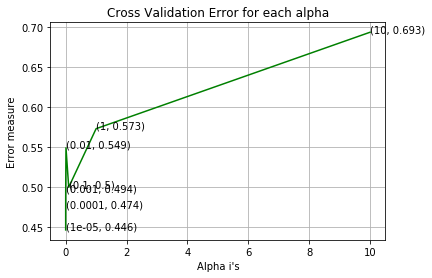

In [0]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  1e-05 The train log loss is: 0.45074353360243696
For values of best alpha =  1e-05 The test log loss is: 0.4464618542962933
Total number of data points : 30000


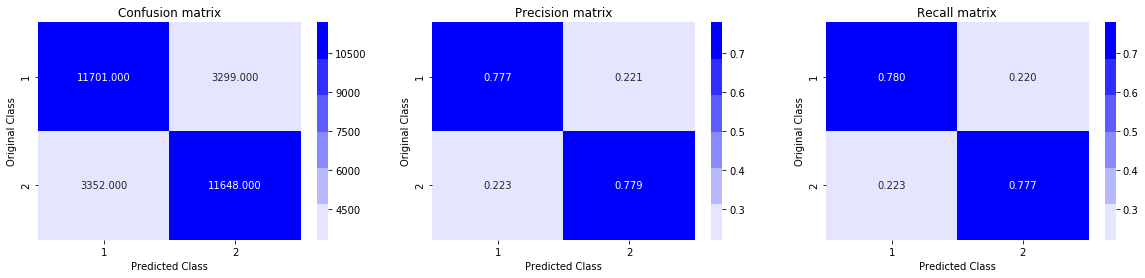

In [0]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge',
                    random_state=1234, n_jobs=-1)
clf.fit(X_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, Y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 
      "The train log loss is:",log_loss(Y_train, predict_y,
                             labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 
      "The test log loss is:",log_loss(Y_test, predict_y,
                             labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

In [0]:
table.add_row(['Simple SVM',' alpha = 0.0001', 'Train Log=0.45  Test Log=0.44'])
print(table)

+--------------+-----------------+-------------------------------+
|    Model     | Hyperparameters |            Log_Loss           |
+--------------+-----------------+-------------------------------+
| Logistic Reg |  alpha = 0.0001 | Train Log=0.43  Test Log=0.42 |
|  Simple SVM  |  alpha = 0.0001 | Train Log=0.45  Test Log=0.44 |
+--------------+-----------------+-------------------------------+


In [0]:
# Now for working on XGBoost we have to reload the old data. For that we re-run the 
# code from the above cells

In [0]:
from xgboost import XGBClassifier

In [7]:
# !python -m spacy download en_core_web_md

     |████████████████████████████████| 95.4MB 2.7MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.1.0-cp36-none-any.whl size=97126237 sha256=0ad61ae499ad1fd2c54494dfbfeeb6ade526f92b83ce57211ac6425bae7ce4b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-8jw_cg4l/wheels/c1/2c/5f/fd7f3ec336bf97b0809c86264d2831c5dfb00fc2e239d1bb01
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [0]:
import en_core_web_md
from bs4 import BeautifulSoup
from tqdm import tqdm
import nltk

In [0]:
# Read dataframe and filter balanced data. Using only 50k 
# due to resource constraints

df = pd.read_csv(data_dir+"Quora/train.csv")

In [0]:
df = df[df.is_duplicate==0][:25000].append(df[df.is_duplicate==1][:25000])
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
SAFE_DIV = 0.0001 
STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'")\
                .replace("’", "'").replace("won't", "will not")\
                .replace("cannot", "can not").replace("can't", "can not")\
                .replace("n't", " not").replace("what's", "what is")\
                .replace("it's", "it is").replace("'ve", " have")\
                .replace("i'm", "i am").replace("'re", " are")\
                .replace("he's", "he is").replace("she's", "she is")\
                .replace("'s", " own").replace("%", " percent ")\
                .replace("₹", " rupee ").replace("$", " dollar ")\
                .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        example1 = BeautifulSoup(x)
        x = example1.get_text().strip()
               
    
    return x

In [0]:
df['question1'] = df['question1'].apply(lambda x: preprocess(x))
df['question2'] = df['question2'].apply(lambda x: preprocess(x))

In [14]:
df = df.drop(columns=['id','qid1','qid2'])
df.head()

,question1,question2,is_duplicate
0,what is the most popular app at your school,what is the most popular app at your university,0
1,is world war 3 on the way with the us elections,is world war 3 coming,1
2,can a boy join the indian armed forces after a...,how can i join indian armed forces,1
3,was the isc 2016 accounts paper easy,was the isc accounts 2016 paper tough,1
4,what are some good ways to insult a dartmouth ...,what makes some students unable to fit in at d...,0


In [0]:
df['question_pair'] = df.question1+' '+df.question2
df = df.drop(columns=['question1','question2'])

In [0]:
X_data=np.array(df.question_pair.tolist())
y_data=np.array(df.is_duplicate.tolist())

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                        test_size=0.30, stratify=y_data,random_state =1234) 

In [0]:
tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(X_train)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [0]:
# en_vectors_web_md, having 300 vectors.
nlp = en_core_web_md.load()
# nlp = spacy.load('en_core_web_sm')

vecs1 = []
for qp in X_train:
  doc1 = nlp(str(qp).strip())
  mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
  for i,word1 in enumerate(doc1):
      # word2vec
      vec1 = word1.vector
      # fetch df score
      try:
          idf = word2tfidf[str(word1)]
      except:
          idf = 0
      # compute final vec
      mean_vec1[i] += vec1 * idf
  mean_vec1 = mean_vec1.mean(axis=0)
  vecs1.append(mean_vec1)

In [0]:
vecs2=[]
for qp in X_test:
  doc2 = nlp(str(qp).strip()) 
  mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
  for i,word2 in enumerate(doc2):
      # word2vec
      vec2 = word2.vector
      # fetch df score
      try:
          idf = word2tfidf[str(word2)]
      except:
          #print word
          idf = 0
      # compute final vec
      mean_vec2[i] += vec2 * idf
  mean_vec2 = mean_vec2.mean(axis=0)
  vecs2.append(mean_vec2)

In [0]:
X_train=np.array(vecs1)
X_test=np.array(vecs2)

In [38]:
clf = XGBClassifier(random_state=1234)


params = {
# 'gamma': [0, 0.25, 0.5, 1.0],
# 'reg_lambda': [0.1, 1.0, 5.0, 10.0],
# 'eta' : [0.02, 0.2],
# 'max_depth' : [5, 15, 30, 50, 75, 100, 125, 150],
# 'min_samples_leaf' : [1, 3, 5, 10, 20, 50],
# 'n_estimators' : [50, 150, 300, 500]

# 'eta' : [0.02],
'max_depth' : [5, 15, 30, 50, 80],
'min_samples_leaf' : [5, 10, 20, 30, 50],
'n_estimators' : [100, 150, 200, 400]
}

# d_train = xgb.DMatrix(X_train, label=y_train)
# d_test = xgb.DMatrix(X_test, label=y_test)
# watchlist = [(d_train, 'train'), (d_test, 'valid')]

# bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, 
#                 verbose_eval=10)

split_method = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1234)
randomSearch = RandomizedSearchCV(clf, params, n_iter=10, n_jobs=-1, verbose=3,
#               cv=split_method.split(X_train,y_train),
              cv=3, return_train_score=True,
              scoring='neg_log_loss', refit=False, random_state=1234)

randomSearch.fit(X_train,y_train)

# xgdmat = xgb.DMatrix(X_train,y_train)
# predict_y = bst.predict(d_test)
# print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 272.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=1234, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
       

In [39]:
print(randomSearch.best_params_)
print(randomSearch.cv_results_['mean_train_score'].mean())

{'n_estimators': 100, 'min_samples_leaf': 20, 'max_depth': 50}
-0.010713534025180634


In [0]:
# We tweaked the XGBoost to include the sklearn-XGBClassifier flavour and also
# because it is intuitive to make it work with RandomSearchCV. We initially 
# tried to get a hang of the hyperparamas by running on short data points and the
# we tried to run on the full 100k datapoints using the hyper-params range we
# set up. But even the Google Colab in GPU mode crashed, so we reduced the data
# to 50k balanced points and finally after around 8+ hours we got the results.
# The above code has the final set of hyperparams.
# The detailed experiments : 

In [0]:
# randomSearch.best_params_ # best params after randomized search 
# {'eta': 0.02, 'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 200}
# randomSearch.best_params_ #100 points

# print(randomSearch.best_params_)  #500 points
# print(randomSearch.best_score_)
# {'n_estimators': 50, 'min_samples_leaf': 3, 'max_depth': 3, 'eta': 0.02}
# -0.5017438927479089


# print(randomSearch.best_params_)  #500 points, with pruned hyperparams
# print(randomSearch.best_score_)
# {'n_estimators': 100, 'min_samples_leaf': 70, 'max_depth': 10, 'eta': 0.02}
# -0.5701361708370969

# print(randomSearch.best_params_)#5000  points
# print(randomSearch.best_score_)
# {'n_estimators': 150, 'min_samples_leaf': 50, 'max_depth': 3, 'eta': 0.02}
# -0.37187250680599826


# print(randomSearch.best_params_)
# print(randomSearch.cv_results_['mean_test_score'])
# print(randomSearch.best_score_)
# {'reg_lambda': 10.0, 'n_estimators': 100, 'min_samples_leaf': 20, 'max_depth': 20, 'gamma': 0.25, 'eta': 0.02}
# [-0.54784296 -0.55312863 -0.54542933 -0.57557731 -0.53977786 -0.52132554
#  -0.53746365 -0.56679342 -0.5277555  -0.5277555 ]
# -0.5213255383633077


# print(randomSearch.best_params_)
# print(randomSearch.cv_results_['mean_test_score'])
# print(randomSearch.best_score_)
# {'reg_lambda': 10.0, 'n_estimators': 200, 'min_samples_leaf': 15, 'max_depth': 3, 'gamma': 0.5, 'eta': 0.02}
# [-0.37403748 -0.37403748 -0.375991   -0.37579951 -0.38147701 -0.37183126
#  -0.37517306 -0.38735439 -0.37514236 -0.38105273]
# -0.3718312576468452

# print(randomSearch.best_params_)
# print(randomSearch.cv_results_['mean_test_score'])
# print(randomSearch.best_score_)
# {'n_estimators': 100, 'min_samples_leaf': 20, 'max_depth': 3, 'eta': 0.02}
# [-0.61247562 -0.57013617 -0.58998491 -0.59483405 -0.5399712  -0.57013617
#  -0.57013617 -0.59483405 -0.57213978 -0.59523224]
# -0.5399712001821027


In [24]:
clf = XGBClassifier(random_state=1234, max_depth=50, min_samples_leaf=20,
                      n_estimators=100)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, min_samples_leaf=20, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1234, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [27]:
clf = XGBClassifier(random_state=1234, max_depth=5, min_samples_leaf=20,
                      n_estimators=200)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=20, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1234, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [25]:
# This is result for the optimal params, not considering due to extreme overfitting
predict_trainy = clf.predict(X_train)
print("The train log loss is:",log_loss(y_train, predict_trainy, eps=1e-15))

The train log loss is: 0.0009868450283535956


In [28]:
predict_trainy = clf.predict(X_train)
print("The train log loss is:",log_loss(y_train, predict_trainy, eps=1e-15))

The train log loss is: 4.567060443449054


In [29]:
predict_testy = clf.predict(X_test)
print("The test log loss is:",log_loss(y_test, predict_testy, eps=1e-15))

The test log loss is: 10.421612181144269


In [40]:
table.add_row(['XGBoost', 'max_depth=5, min_samples_leaf=20, n_estimators=200',
          'Train Log=4.5  Test Log=10.4'])
print(table)

+--------------+----------------------------------------------------+-------------------------------+
|    Model     |                  Hyperparameters                   |            Log_Loss           |
+--------------+----------------------------------------------------+-------------------------------+
| Logistic Reg |                   alpha = 0.0001                   | Train Log=0.43  Test Log=0.42 |
|  Simple SVM  |                   alpha = 0.0001                   | Train Log=0.45  Test Log=0.44 |
|   XGBoost    | max_depth=5, min_samples_leaf=20, n_estimators=200 |  Train Log=4.5  Test Log=10.4 |
+--------------+----------------------------------------------------+-------------------------------+


Total number of data points : 15000


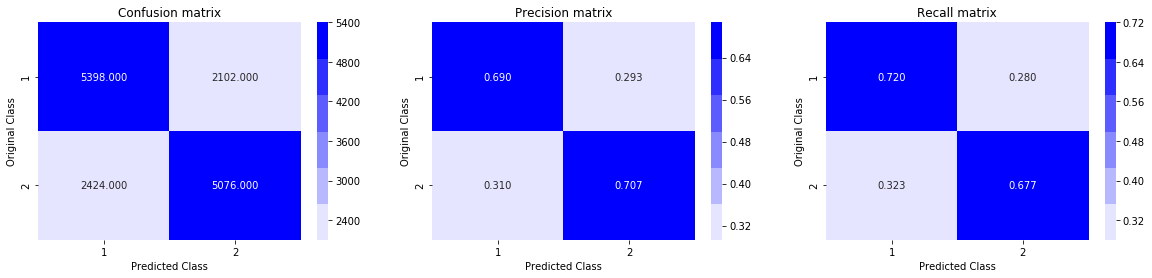

In [43]:
predict_testy =np.array(predict_testy>0.5,dtype=int)
print("Total number of data points :", len(predict_testy))
plot_confusion_matrix(y_test, predict_testy)

In [0]:
## Conclusions

# So, in the end we figure out that the Logistic Regression comes out as the best 
# classifier so far, based on the given data points.
# The Simple SVM is also close by, but both do not seem to improve much given  the data 
# points we are using and the computing power we have.
# Lastly, theoretical understanding tells us that the Randomforests should have performed 
# weel too, but it didn't come out well, given the hyperparameters and the data
